<a href="https://colab.research.google.com/github/27-Abhi/27-Abhi/blob/main/MessidiorParellelCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [ ]:
!pip install tensorflow
!pip install pyspark==3.2.0     # Install PySpark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 12.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805894 sha256=b6e7b3bebab8c03674692ac63b66a2a237e5e881cd2a995b2b62038fd9f99234
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
pip install rarfile

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the zipped dataset file in your Google Drive
rar_file_path  = '/content/drive/MyDrive/Dataset.rar'

In [ ]:
# Directory to extract the dataset
extracted_dir = '/content/'

In [ ]:
pip install opencv-python-headless opencv-python-headless[extras]


In [ ]:
import rarfile

# Extract the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extracted_dir)

Test new filters to enhance features

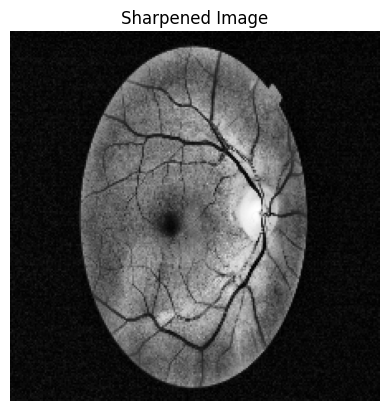

Image processing complete.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the images
extracted_dir = '/content/Dataset'

# Define the output directory for processed images
output_dir = '/content/processed_images5'
os.makedirs(output_dir, exist_ok=True)

# Define the target size for resizing
target_size = (224, 224)

# Define CLAHE parameters
clip_limit = 8.0  # Increase this value for more aggressive contrast enhancement
tile_grid_size = (8, 8)  # Adjust the grid size as needed

# Define Unsharp Masking parameters
kernel_size = (5, 5)
sigma = 0
alpha = 0  # Adjust this parameter to control the strength of sharpening

# Loop through each image file in the directory
for filename in os.listdir(extracted_dir):
    if filename.endswith(".tif"):  # Assuming images are TIFF format
        # Read the image
        image_path = os.path.join(extracted_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read TIFF images in grayscale

        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        clahe_image = clahe.apply(image)

        # Apply Unsharp Masking for sharpening
        blurred = cv2.GaussianBlur(clahe_image, kernel_size, sigma)
        sharpened = cv2.addWeighted(clahe_image, 1.0 + alpha, blurred, -alpha, 0)

        # Resize the image
        resized_sharpened_image = cv2.resize(sharpened, target_size)

        # Write the processed image to the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_sharpened_image)

        # Display one processed image for visualization
        plt.imshow(resized_sharpened_image, cmap='gray')
        plt.axis('off')
        plt.title('Sharpened Image')
        plt.show()

        break  # Break after processing and displaying one image

print("Image processing complete.")




# Working code below


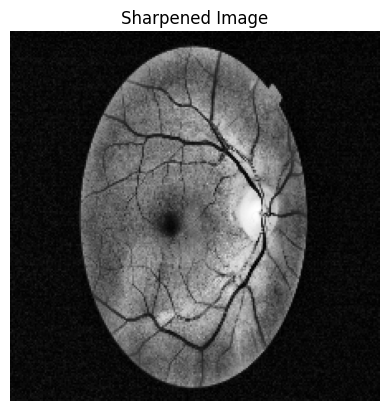

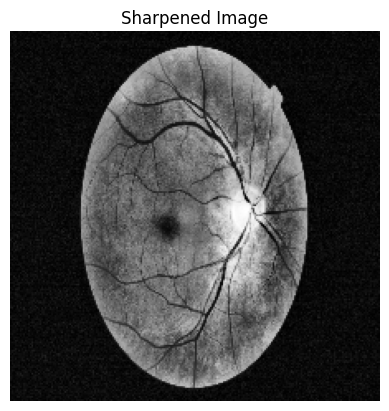

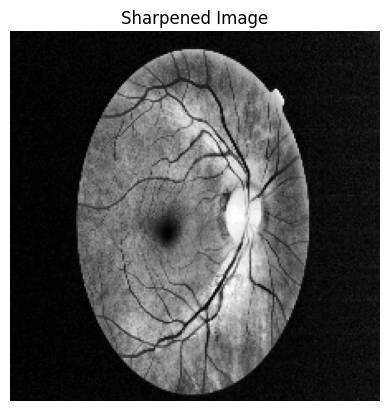

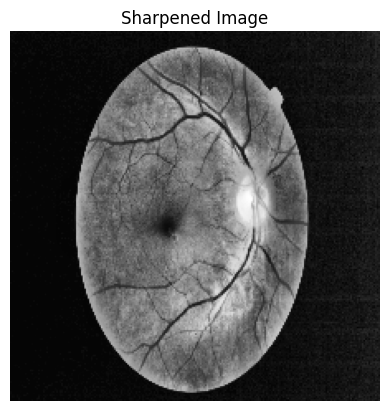

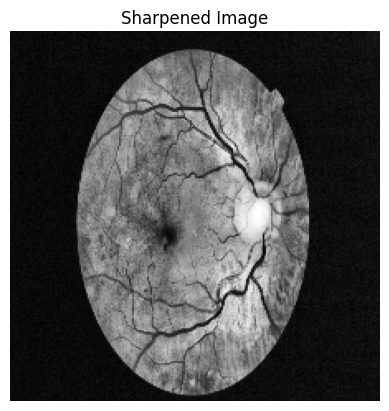

Image processing complete.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the images
extracted_dir = '/content/Dataset'

# Define the output directory for processed images
output_dir = '/content/processed'
os.makedirs(output_dir, exist_ok=True)

# Define the target size for resizing
target_size = (224, 224)

# Define CLAHE parameters
clip_limit = 8.0  # Increase this value for more aggressive contrast enhancement
tile_grid_size = (8, 8)  # Adjust the grid size as needed

# Define Unsharp Masking parameters
kernel_size = (5, 5)
sigma = 0  #Gaussian blur
alpha = 0  #Adjust this parameter to control the strength of sharpening

# Counter for displaying only 5 images
image_count = 0

# Loop through each image file in the directory
for filename in os.listdir(extracted_dir):
    if filename.endswith((".tif", ".jpg", ".jpeg", ".png")):
        # Read the image
        image_path = os.path.join(extracted_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale

        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        clahe_image = clahe.apply(image)

        # Apply Unsharp Masking for sharpening
        blurred = cv2.GaussianBlur(clahe_image, kernel_size, sigma)
        sharpened = cv2.addWeighted(clahe_image, 1.0 + alpha, blurred, -alpha, 0)

        # Resize the image
        resized_sharpened_image = cv2.resize(sharpened, target_size)

        # Write the processed image to the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_sharpened_image)

        # Display only the first 5 processed images
        if image_count < 5:
            plt.imshow(resized_sharpened_image, cmap='gray')
            plt.axis('off')
            plt.title('Sharpened Image')
            plt.show()

        image_count += 1

print("Image processing complete.")


# Below code to combbine all annonation files

In [ ]:
import os
import pandas as pd

# Path to the directory containing annotation files
annotation_dir = '/content/Dataset'

# List to store individual DataFrames from each annotation file
dfs = []

# Iterate over each annotation file in the directory
for filename in os.listdir(annotation_dir):
    if filename.endswith('.xls'):  # Process only Excel files
        file_path = os.path.join(annotation_dir, filename)
        df = pd.read_excel(file_path)  # Read the Excel file into a DataFrame
        dfs.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Path to save the combined annotation file
output_file = '/content/combined_annotations.xlsx'

# Save the combined DataFrame to a new Excel file
combined_df.to_excel(output_file, index=False)

print("Combined annotation file saved successfully at:", output_file)


Combined annotation file saved successfully at: /content/combined_annotations.xlsx


In [ ]:
# Check the schema
print("Schema:")
print(annotations_schema)

# Check the first few rows of the DataFrame
print("\nFirst few rows of DataFrame:")
print(annotations_pdf.head())


Schema:
StructType(List(StructField(Image name,StringType,true),StructField(Retinopathy grade,StringType,true)))

First few rows of DataFrame:
                   Image name Ophthalmologic department  Retinopathy grade  \
0  20060411_57879_0200_PP.tif         CHU de St Etienne                  3   
1  20060411_57962_0200_PP.tif         CHU de St Etienne                  1   
2  20060411_57986_0200_PP.tif         CHU de St Etienne                  1   
3  20060411_58051_0200_PP.tif         CHU de St Etienne                  1   
4  20060411_58071_0200_PP.tif         CHU de St Etienne                  0   

   Risk of macular edema   
0                       2  
1                       0  
2                       0  
3                       0  
4                       0  


# :Feature extraction using MobilenetV2 along with Sampling with replacement



In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import resample
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(128, 128, 3))

def extract_mobilenet_features(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image to 128x128
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = mobilenet_model.predict(img_array)
    return features[0]

# Path to the directory containing images and annotation file
images_dir = '/content/processed'
annotations_file = '/content/combined_annotations.xlsx'

# Read the annotation file
annotations = pd.read_excel(annotations_file, usecols=['Image name', 'Retinopathy grade'])

# Rename the columns for convenience
annotations.columns = ['Image', 'Class']

# Map the Retinopathy grade to class labels (assuming 0, 1, 2, 3)
class_map = {0: 0, 1: 1, 2: 2, 3: 3}

# Number of images per class for feature extraction
images_per_class = 500

# Initialize an empty DataFrame to store sampled annotations
sampled_annotations = pd.DataFrame(columns=['Image', 'Class'])

# Perform sampling for each class
for class_name, class_label in class_map.items():
    # Get all annotations for the current class
    class_annotations = annotations[annotations['Class'] == class_label]
    # Sample 500 images for each class
    sampled_class_annotations = resample(class_annotations, n_samples=images_per_class, replace=True, random_state=42)
    # Append the sampled annotations to the DataFrame
    sampled_annotations = pd.concat([sampled_annotations, sampled_class_annotations])

# Extract features for each class separately
for class_name, class_label in class_map.items():
    class_features = []
    class_annotations = sampled_annotations[sampled_annotations['Class'] == class_label]
    for _, row in class_annotations.iterrows():
        img_filename = row['Image']
        img_path = os.path.join(images_dir, img_filename)
        if os.path.exists(img_path):
            features = extract_mobilenet_features(img_path)
            class_features.append(features)
    # Convert list to numpy array
    class_features_array = np.array(class_features)
    # Save extracted features to a single file per class
    np.save(os.path.join('/content/', f'{class_name}_features.npy'), class_features_array)
    # Display the shape of the saved features array
    print(f"Features for class '{class_name}':", class_features_array.shape)


1/1 [==============================] - 0s 35ms/step
Features for class '0': (500, 1280)
1/1 [==============================] - 0s 35ms/step
Features for class '1': (500, 1280)
1/1 [==============================] - 0s 55ms/step
Features for class '2': (500, 1280)
1/1 [==============================] - 0s 34ms/step
Features for class '3': (500, 1280)


Printing features

In [ ]:
class_folders = [0,1,2,3] # 0,1,2,3 being retinopathy grade

for folder in class_folders:
    features_path = f'/content/{folder}_features.npy'
    features = np.load(features_path)
    print(f"Features for '{folder}':")
    print(features)

Features for '0':
[[0.0000000e+00 0.0000000e+00 2.0410258e-01 ... 2.5798768e-01
  4.6797287e-01 0.0000000e+00]
 [0.0000000e+00 4.1166306e-02 6.3870096e-01 ... 9.0768874e-02
  7.8962445e-03 0.0000000e+00]
 [0.0000000e+00 4.8941445e-01 1.3988462e-01 ... 6.9007710e-02
  3.6584079e-02 0.0000000e+00]
 ...
 [0.0000000e+00 6.6186562e-02 1.7357683e+00 ... 8.1796974e-01
  0.0000000e+00 0.0000000e+00]
 [1.1489713e-01 0.0000000e+00 1.8291299e-01 ... 0.0000000e+00
  2.2630630e+00 1.6111881e-03]
 [0.0000000e+00 0.0000000e+00 2.2090399e-01 ... 1.5924972e-01
  4.4191480e-01 0.0000000e+00]]
Features for '1':
[[0.07522404 0.01946138 0.3515383  ... 0.         0.         0.        ]
 [0.         0.         0.5646242  ... 0.01523261 0.17095119 0.        ]
 [0.         0.         1.8960268  ... 1.1639365  0.8676339  0.        ]
 ...
 [0.         0.12132514 0.98178506 ... 0.06772196 0.96721435 0.        ]
 [0.         0.13408104 0.5008411  ... 0.02354756 0.07999033 0.        ]
 [0.         0.05361082 0.3134

Trying with Random forest classifier

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import Vectors

# Create a Spark session
spark = SparkSession.builder.appName("DiabeticRetinopathy").getOrCreate()

# Load features from .npy files (adjust filenames accordingly)
class_features = {}  # Dictionary to store features for each class
for class_name in class_folders:
    features = np.load(f"/content/{class_name}_features.npy")
    class_features[class_name] = features.tolist()

# Create a DataFrame with features and labels
features_data = []  # List to store (features, label) tuples
for label, class_name in enumerate(class_folders):
    features = class_features[class_name]
    for feature in features:
        features_data.append((Vectors.dense(feature), float(label)))  # Use float() to cast label to DoubleType

# Create the DataFrame
features_df = spark.createDataFrame(features_data, ["features", "label"])

# Vector assembler
assembler = VectorAssembler(inputCols=["features"], outputCol="feature_vector")

# Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="feature_vector", numTrees=10)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Split data into train and validation sets
train_data, val_data = features_df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on validation data
predictions = model.transform(val_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.2f}")

# Convert the predictions and labels to RDD for MulticlassMetrics
predictionAndLabels = predictions.select("prediction", col("label").cast(DoubleType())).rdd  # Cast label to DoubleType

# Create MulticlassMetrics object
metrics = MulticlassMetrics(predictionAndLabels)


# Print confusion matrix
print("Confusion Matrix:")
print(metrics.confusionMatrix().toArray())

# Calculate precision, recall, and f1-score for each class
for label in range(len(class_folders)):
    precision = metrics.precision(label)
    recall = metrics.recall(label)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    print(f"Class {label} Precision = {precision}")
    print(f"Class {label} Recall = {recall}")
    print(f"Class {label} F1 Score = {f1_score}")


# Save the model for deployment
model.stages[-1].save("rdiabetic_retinopathy_model1_mobilenet")


Accuracy: 0.72
Confusion Matrix:
[[57.  4.  7.  3.]
 [11. 64. 12.  4.]
 [10.  9. 70.  9.]
 [17.  5. 10. 66.]]
Class 0 Precision = 0.6
Class 0 Recall = 0.8028169014084507
Class 0 F1 Score = 0.6867469879518073
Class 1 Precision = 0.7804878048780488
Class 1 Recall = 0.7032967032967034
Class 1 F1 Score = 0.739884393063584
Class 2 Precision = 0.7070707070707071
Class 2 Recall = 0.7142857142857143
Class 2 F1 Score = 0.7106598984771574
Class 3 Precision = 0.8048780487804879
Class 3 Recall = 0.673469387755102
Class 3 F1 Score = 0.7333333333333334


Training Set Class Distribution:
+-------------+-----+
|indexed_label|count|
+-------------+-----+
|          0.0|  372|
|          1.0|  370|
|          3.0|  371|
|          2.0|  393|
+-------------+-----+

Testing Set Class Distribution:
+-------------+-----+
|indexed_label|count|
+-------------+-----+
|          0.0|  128|
|          1.0|  130|
|          3.0|  129|
|          2.0|  107|
+-------------+-----+

Epoch 1/2000
48/48 [==============================] - 2s 28ms/step - loss: 1.6357 - accuracy: 0.2576 - val_loss: 1.3968 - val_accuracy: 0.3219
Epoch 2/2000
48/48 [==============================] - 1s 24ms/step - loss: 1.5220 - accuracy: 0.3068 - val_loss: 1.3455 - val_accuracy: 0.3704
Epoch 3/2000
48/48 [==============================] - 1s 21ms/step - loss: 1.4589 - accuracy: 0.3227 - val_loss: 1.2939 - val_accuracy: 0.3887
Epoch 4/2000
48/48 [==============================] - 1s 24ms/step - loss: 1.4263 - accuracy: 0.3300 - val_loss: 1.2605 - val_accuracy: 0.4190
Epoch 5/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: /content/parallel_cnn_model.h5
Model saved to Google Drive at: /content/drive/MyDrive/Us/parallel_cnn_model_new.h5
Testing Accuracy: 0.93


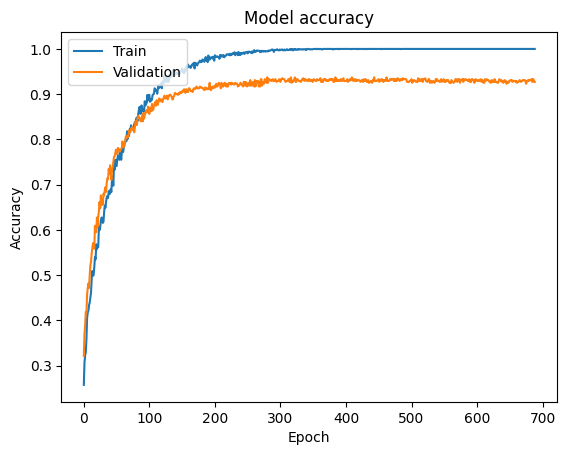

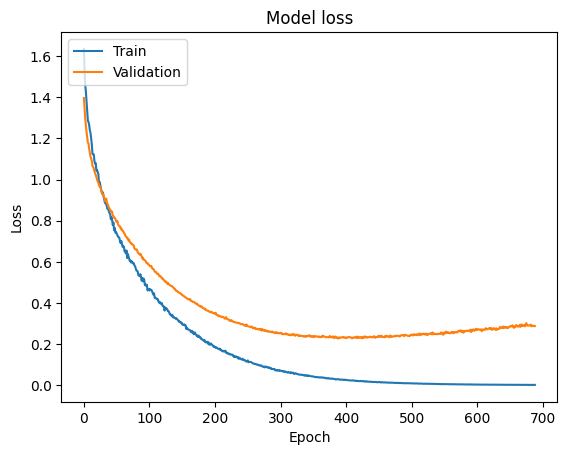

In [ ]:
import tensorflow as tf
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import Vectors
import numpy as np
import matplotlib.pyplot as plt


# Create a Spark session
spark = SparkSession.builder.appName("DiabeticRetinopathy").getOrCreate()

# Replace class_folders with your actual class names
class_folders = [0,1,2,3]

# Load features from .npy files (adjust filenames accordingly)
class_features = {}  # Dictionary to store features for each class

for class_name in class_folders:
    features = np.load(f"/content/{class_name}_features.npy")
    class_features[class_name] = features.tolist()

# Create a DataFrame with features and labels
features_data = []  # List to store (features, label) tuples

for label, class_name in enumerate(class_folders):
    features = class_features[class_name]
    for feature in features:
        features_data.append((Vectors.dense(feature), float(label)))

# Create the DataFrame
features_df = spark.createDataFrame(features_data, ["features", "label"])

# Convert labels to numeric indices
label_indexer = StringIndexer(inputCol="label", outputCol="indexed_label")

# Vector assembler
assembler = VectorAssembler(inputCols=["features"], outputCol="features_vector")

# Apply the pipeline to the entire DataFrame
pipeline = Pipeline(stages=[label_indexer, assembler])
processed_df = pipeline.fit(features_df).transform(features_df)

# Split the data into training and testing sets (75% training, 25% testing)
(training_data, testing_data) = processed_df.randomSplit([0.75, 0.25], seed=123)

# Print class distribution in the training set
print("Training Set Class Distribution:")
training_data.groupBy("indexed_label").count().show()

# Print class distribution in the testing set
print("Testing Set Class Distribution:")
testing_data.groupBy("indexed_label").count().show()

# Convert the training data features to the correct shape
features_array_train = np.array(training_data.select("features_vector").rdd.map(lambda x: np.array(x.features_vector.toArray())).collect())

# Convert the testing data features to the correct shape
features_array_test = np.array(testing_data.select("features_vector").rdd.map(lambda x: np.array(x.features_vector.toArray())).collect())

# Reshape the features for all datasets (assuming each feature vector has size 1280)
input_shape = (1280,)
features_array_train = features_array_train.reshape(-1, *input_shape)
features_array_test = features_array_test.reshape(-1, *input_shape)

# Convert the training data labels to the correct shape
labels_array_train = np.array(training_data.select("indexed_label").rdd.map(lambda x: x.indexed_label).collect())

# Convert the testing data labels to the correct shape
labels_array_test = np.array(testing_data.select("indexed_label").rdd.map(lambda x: x.indexed_label).collect())

# Build the parallel CNN model
input_layer = tf.keras.layers.Input(shape=input_shape)

# Branch 1
branch1 = tf.keras.layers.Dense(512, activation='relu')(input_layer)
branch1 = tf.keras.layers.Dropout(0.3)(branch1)

# Branch 2
branch2 = tf.keras.layers.Dense(512, activation='relu')(input_layer)
branch2 = tf.keras.layers.Dropout(0.3)(branch2)

# Branch 3
branch3 = tf.keras.layers.Dense(256, activation='relu')(input_layer)
branch3 = tf.keras.layers.Dropout(0.3)(branch3)

# Merge branches
merged = tf.keras.layers.Concatenate()([branch1, branch2, branch3])

output_layer = tf.keras.layers.Dense(len(class_folders), activation='softmax')(merged)

# Create the parallel CNN model
parallel_cnn_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
parallel_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Adjusted learning rate
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

# Define the number of epochs
epochs = 2000  # Change the number of epochs as needed

# Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)  # Adjusted patience

# Train the model with validation data and early stopping
history = parallel_cnn_model.fit(features_array_train, labels_array_train, epochs=epochs,
                                 validation_data=(features_array_test, labels_array_test),
                                 callbacks=[early_stopping])

# Save the trained model in HDF5 format
model_save_path_h5 = "/content/parallel_cnn_model.h5"
parallel_cnn_model.save(model_save_path_h5)
print(f"Model saved at: {model_save_path_h5}")


# Save the trained model in HDF5 format to Google Drive
model_save_path_drive = "/content/drive/MyDrive/Us/parallel_cnn_model_new.h5"
parallel_cnn_model.save(model_save_path_drive)
print(f"Model saved to Google Drive at: {model_save_path_drive}")


# Apply the UDF to the testing DataFrame
apply_tf_model_udf = udf(lambda x: float(np.argmax(parallel_cnn_model.predict(np.array(x.toArray()).reshape(-1, *input_shape))[0])), DoubleType())
predictions_testing_df = testing_data.withColumn("prediction", apply_tf_model_udf("features_vector"))

# Evaluate the model on testing data
evaluator_test = MulticlassClassificationEvaluator(labelCol="indexed_label", predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator_test.evaluate(predictions_testing_df)
print(f"Testing Accuracy: {accuracy_test:.2f}")



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Additional code for confusion matrix and classification report
true_labels = np.array(predictions_testing_df.select("indexed_label").rdd.map(lambda x: x.indexed_label).collect())
predicted_labels = np.array(predictions_testing_df.select("prediction").rdd.map(lambda x: x.prediction).collect())

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_names = [str(i) for i in range(len(class_folders))]  # Assuming class labels are numerical
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[109   5   9   5]
 [  2 128   0   0]
 [  3   1 101   2]
 [  8   0   0 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       128
           1       0.96      0.98      0.97       130
           2       0.92      0.94      0.93       107
           3       0.95      0.94      0.94       129

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



1) SVM
2) Knn
3) hierarchial  classification  methods

try feature extraction: Dimensionakity reduction

SVM

In [ ]:
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import numpy as np

# Create a Spark session
spark = SparkSession.builder.appName("DiabeticRetinopathy").getOrCreate()

# Load features from .npy files (adjust filenames accordingly)
#class_folders = ["class1", "class2", "class3", "class4"]  # Example class folders
class_features = {}  # Dictionary to store features for each class
for class_name in class_folders:
    features = np.load(f"/content/{class_name}_features.npy")
    class_features[class_name] = features.tolist()

# Create a DataFrame with features and labels
features_data = []  # List to store (features, label) tuples
for label, class_name in enumerate(class_folders):
    features = class_features[class_name]
    for feature in features:
        features_data.append((Vectors.dense(feature), float(label)))  # Use float() to cast label to DoubleType

# Create the DataFrame
features_df = spark.createDataFrame(features_data, ["features", "label"])

# Vector assembler
assembler = VectorAssembler(inputCols=["features"], outputCol="feature_vector")

# LinearSVC Classifier
svm = LinearSVC(maxIter=50, regParam=0.1)

# OneVsRest Classifier
ovr_classifier = OneVsRest(classifier=svm, labelCol="label", featuresCol="feature_vector")

# Create a pipeline
pipeline = Pipeline(stages=[assembler, ovr_classifier])

# Split data into train and validation sets
train_data, val_data = features_df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on validation data
predictions = model.transform(val_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.2f}")

# Save the model for deployment
model.stages[-1].save("svmdiabetic_retinopathy_model1_ovrr")



Accuracy: 0.89


In [ ]:
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Print confusion matrix
predictionAndLabels = predictions.select("prediction", "label")
metrics = MulticlassMetrics(predictionAndLabels.rdd)
print("Confusion Matrix:")
print(metrics.confusionMatrix().toArray())


Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
[[56.  1.  7.  7.]
 [ 5. 86.  0.  0.]
 [ 6.  2. 86.  4.]
 [ 4.  1.  2. 91.]]


hierchial

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("HierarchicalClustering") \
    .getOrCreate()

# Load features from .npy files and create a DataFrame
class_folders = [0, 1, 2, 3]
features_list = []
for class_name in class_folders:
    features = np.load(f"/content/{class_name}_features.npy")
    for feature in features:
        features_list.append((class_name, Vectors.dense(feature)))  # Convert array to DenseVector

# Create a DataFrame
data = spark.createDataFrame(features_list, ["class", "features"])

# Assemble features into a single column
assembler = VectorAssembler(inputCols=["features"], outputCol="features_vec")
data_assembled = assembler.transform(data)

# Perform hierarchical clustering using BisectingKMeans
k = 4  # Number of clusters
bkm = BisectingKMeans().setK(k).setSeed(1)
model = bkm.fit(data_assembled)

# Get cluster predictions
predictions = model.transform(data_assembled)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette_avg = evaluator.evaluate(predictions)
print(f"Silhouette score: {silhouette_avg}")



Silhouette score: 0.10569531878182853


knn

In [ ]:
from pyspark.sql import SparkSession
from pyspark.mllib.evaluation import MulticlassMetrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a Spark session
spark = SparkSession.builder.appName("DiabeticRetinopathy").getOrCreate()

# Load features from .npy files (adjust filenames accordingly)
class_folders = [0, 1, 2, 3]  # Example class folders
class_features = {}  # Dictionary to store features for each class
for class_name in class_folders:
    features = np.load(f"/content/{class_name}_features.npy")
    class_features[class_name] = features.tolist()

# Create a DataFrame with features and labels
features_data = []  # List to store (features, label) tuples
for label, class_name in enumerate(class_folders):
    features = class_features[class_name]
    for feature in features:
        features_data.append((feature, float(label)))  # Use float() to cast label to DoubleType

# Create the DataFrame
features_df = spark.createDataFrame(features_data, ["features", "label"])

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = features_df.toPandas()

# Extract features and labels from Pandas DataFrame
X = np.array(pandas_df["features"].tolist())
y = np.array(pandas_df["label"].tolist())

# Instantiate and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

# Make predictions
predictions = knn_model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Save the model for deployment
joblib.dump(knn_model, "diabetic_retinopathy_model_knn1.pkl")






Accuracy: 0.86


['diabetic_retinopathy_model_knn1.pkl']

In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))

# Print classification report
print("Classification Report:")
print(classification_report(y, predictions, target_names=[f"Class {label}" for label in class_folders]))

Confusion Matrix:
[[375  40  53  32]
 [  6 491   1   2]
 [ 20  23 446  11]
 [ 23  21  38 418]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.75      0.81       500
     Class 1       0.85      0.98      0.91       500
     Class 2       0.83      0.89      0.86       500
     Class 3       0.90      0.84      0.87       500

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

